In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible

### Data cleaning and EDA

In [2]:
df_train = pd.read_csv(r"C:\Users\ND\Documents\GitHub\drug-recommendation\dataset\drugsComTrain_raw.tsv", sep=None, engine='python')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [4]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
del df_train['Unnamed: 0']
del df_train['date']

In [6]:
print("number of drugs:", len(df_train['drugName'].unique()))
print("number of conditions:", len(df_train['condition'].unique()))

number of drugs: 3436
number of conditions: 885


In [7]:
drug_per_condition = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
drug_per_condition

condition
Not Listed / Othe                              214
Pain                                           200
Birth Control                                  172
High Blood Pressure                            140
Acne                                           117
                                              ... 
Sepsis                                           1
72</span> users found this comment helpful.      1
Microscopic polyangiitis                         1
Short Stature                                    1
Epicondylitis, Tennis Elbow                      1
Name: drugName, Length: 884, dtype: int64

In [8]:
drug_per_condition[:30]

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Osteoarthritis                                 80
Bipolar Disorde                                80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
Endometriosis                                  57
3</span> users found this comment helpful.     57
ADHD                                           55
Asthma, Maintenance                     

In [9]:
#replace wrong name in condition column with NaN
df_train.loc[df_train['condition'].str.contains('</span>',case=False, na=False), 'condition'] = 'NAN'
df_train['condition'].replace('NAN', np.NaN, inplace=True)
df_train['condition'].replace('Not Listed / Othe', np.NaN, inplace=True)

In [10]:
#create a dictionary with drugname:condition to fill NaN
dictionary=df_train.set_index('drugName')['condition'].to_dict()
len(dictionary)

3436

In [11]:
#fill NaN value with correct condition names using created dictionary
df_train.condition.fillna(df_train.drugName.map(dictionary), inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     161297 non-null  object 
 1   condition    161197 non-null  object 
 2   review       161297 non-null  object 
 3   rating       161297 non-null  float64
 4   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ MB


In [12]:
#drop rows with still missing values in condition (100 rows = 0.0006% of total data)
df_train.dropna(inplace=True)

In [13]:
drug_per_condition = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
drug_per_condition

condition
Pain                                            200
Birth Control                                   172
High Blood Pressure                             140
Acne                                            117
Depression                                      105
                                               ... 
Post-Cholecystectomy Diarrhea                     1
Breast Cancer, Palliative                         1
Postoperative Increased Intraocular Pressure      1
Postpartum Breast Pain                            1
Cachexia                                          1
Name: drugName, Length: 810, dtype: int64

In [14]:
drug_per_condition[:30]

condition
Pain                         200
Birth Control                172
High Blood Pressure          140
Acne                         117
Depression                   105
Rheumatoid Arthritis          98
Diabetes, Type 2              89
Allergic Rhinitis             88
Bipolar Disorde               80
Osteoarthritis                80
Anxiety                       78
Insomnia                      78
Abnormal Uterine Bleeding     74
Migraine                      59
Psoriasis                     58
Endometriosis                 57
ADHD                          55
Asthma, Maintenance           54
Chronic Pain                  53
Migraine Prevention           50
Irritable Bowel Syndrome      49
Major Depressive Disorde      49
Urinary Tract Infection       47
ibromyalgia                   45
Postmenopausal Symptoms       44
Bronchitis                    44
HIV Infection                 43
Bacterial Infection           43
GERD                          43
Sinusitis                     42


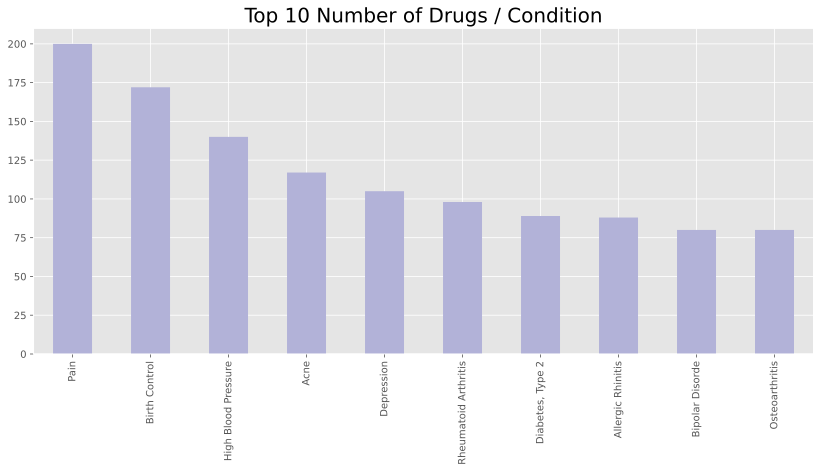

In [15]:
drug_per_condition[:10].plot(kind="bar", figsize = (14,6), fontsize = 10, color="#B2B2D8")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 10 Number of Drugs / Condition", fontsize = 20)
plt.savefig('C:/Users/ND/Documents/GitHub/drug-recommendation/fig/top10_condition.svg')

In [16]:
#selecte conditions with less than 11 drugs
condition_1=drug_per_condition[drug_per_condition<=10].keys()
condition_1

Index(['Uveitis', 'Postpartum Depression', 'Burns, External',
       'Benign Essential Trem', 'Paranoid Disorde', 'Pancreatic Cance',
       'Social Anxiety Disorde', 'Cervical Dystonia', 'Autism',
       'Chronic Fatigue Syndrome',
       ...
       'Performance Anxiety', 'Peritonitis', 'Pertussis',
       'Platelet Aggregation Inhibition', 'Portal Hypertension',
       'Post-Cholecystectomy Diarrhea', 'Breast Cancer, Palliative',
       'Postoperative Increased Intraocular Pressure',
       'Postpartum Breast Pain', 'Cachexia'],
      dtype='object', name='condition', length=625)

In [17]:
#delete condition with less than 11 drugs
df_train1=df_train[~df_train['condition'].isin(condition_1)]
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148387 entries, 1 to 161296
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     148387 non-null  object 
 1   condition    148387 non-null  object 
 2   review       148387 non-null  object 
 3   rating       148387 non-null  float64
 4   usefulCount  148387 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.8+ MB


In [18]:
import re # Regular expression library
import string
import nltk
# nltk.download('averaged_perceptron_tagger.pickle')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [19]:
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
import spacy
nlp = spacy.load("en_core_web_sm")

In [20]:
#remove words needs for sentiment analysis from stopwords
n = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in n:
    stop.remove(i)

In [21]:
#add more words to stopwords
a = ['mg', 'week', 'month', 'day', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
     'august', 'september','october','november','december', 'iv','oral','pound', 'lb', 'month', 'day','night']
for j in a:
    stop.add(j)

In [22]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric=lambda x: re.sub('[^a-zA-Z]', ' ', x)
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
split=lambda x: x.split()

df_train1['review'] = df_train1.review.map(alphanumeric).map(punc_lower).map(split)

<ipython-input-22-2cd1b15f3a2e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['review'] = df_train1.review.map(alphanumeric).map(punc_lower).map(split)


In [23]:
df_train1

,drugName,condition,review,rating,usefulCount
1,Guanfacine,ADHD,"[my, son, is, halfway, through, his, fourth, w...",8.0,192
2,Lybrel,Birth Control,"[i, used, to, take, another, oral, contracepti...",5.0,17
3,Ortho Evra,Birth Control,"[this, is, my, first, time, using, any, form, ...",8.0,10
5,Cialis,Benign Prostatic Hyperplasia,"[nd, day, on, mg, started, to, work, with, roc...",2.0,43
6,Levonorgestrel,Emergency Contraception,"[he, pulled, out, but, he, cummed, a, bit, in,...",1.0,5
...,...,...,...,...,...
161291,Junel 1.5 / 30,Birth Control,"[this, would, be, my, second, month, on, junel...",6.0,0
161293,Metoclopramide,Nausea/Vomiting,"[i, was, given, this, in, iv, before, surgey, ...",1.0,34
161294,Orencia,Rheumatoid Arthritis,"[limited, improvement, after, months, develope...",2.0,35
161295,Thyroid desiccated,Underactive Thyroid,"[i, ve, been, on, thyroid, medication, years, ...",10.0,79


In [24]:
#remove stopwords
df_train1['review_clean']=df_train1['review'].apply(lambda x: [item for item in x if item not in stop])

<ipython-input-24-18712662a058>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['review_clean']=df_train1['review'].apply(lambda x: [item for item in x if item not in stop])


In [25]:
#lemmatizing
df_train1['review_lemm']=df_train1['review_clean'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

<ipython-input-25-0757c09d4bf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['review_lemm']=df_train1['review_clean'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])


In [26]:
del df_train1['review']
del df_train1['review_clean']

In [27]:
df_train1['review']=df_train1['review_lemm'].apply(lambda x:' '.join(x))

<ipython-input-27-41f197630ef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['review']=df_train1['review_lemm'].apply(lambda x:' '.join(x))


In [28]:
del df_train1['review_lemm']
df_train1

,drugName,condition,rating,usefulCount,review
1,Guanfacine,ADHD,8.0,192,son halfway fourth intuniv became concerned be...
2,Lybrel,Birth Control,5.0,17,used take another contraceptive pill cycle hap...
3,Ortho Evra,Birth Control,8.0,10,first time using form birth control glad went ...
5,Cialis,Benign Prostatic Hyperplasia,2.0,43,nd started work rock hard erection however exp...
6,Levonorgestrel,Emergency Contraception,1.0,5,pulled cummed bit took plan b hour later took ...
...,...,...,...,...,...
161291,Junel 1.5 / 30,Birth Control,6.0,0,would second junel birth control year changed ...
161293,Metoclopramide,Nausea/Vomiting,1.0,34,given surgey immediately became anxious could ...
161294,Orencia,Rheumatoid Arthritis,2.0,35,limited improvement month developed bad rash m...
161295,Thyroid desiccated,Underactive Thyroid,10.0,79,thyroid medication year spent first synthroid ...


In [29]:
#save cleaned dataframe to csv file for later use
export_csv = df_train1.to_csv('C:/Users/ND/Documents/GitHub/drug-recommendation/df_train.csv', index = None, header=True)


In [30]:
# follow the same cleaning steps for test data
df_test = pd.read_csv('C:/Users/ND/Documents/GitHub/drug-recommendation/dataset/drugsComTest_raw.tsv',sep=None)

<ipython-input-30-512ebb1a9e01>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_test = pd.read_csv('C:/Users/ND/Documents/GitHub/drug-recommendation/dataset/drugsComTest_raw.tsv',sep=None)


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [32]:
del df_test['Unnamed: 0']
del df_test['date']

In [33]:
print("number of drugs:", len(df_test['drugName'].unique()))
print("number of conditions:", len(df_test['condition'].unique()))

number of drugs: 2637
number of conditions: 709


In [34]:
#delete condition with less than 11 drugs
df_test1=df_test[~df_test['condition'].isin(condition_1)]
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49470 entries, 0 to 53765
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drugName     49470 non-null  object 
 1   condition    49175 non-null  object 
 2   review       49470 non-null  object 
 3   rating       49470 non-null  float64
 4   usefulCount  49470 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [35]:
df_test1.dropna(inplace=True)

<ipython-input-35-ab30fc1bbab3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.dropna(inplace=True)


In [36]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric=lambda x: re.sub('[^a-zA-Z]', ' ', x)
punc_lower=lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
split=lambda x: x.split()

df_test1['review'] = df_test1.review.map(alphanumeric).map(punc_lower).map(split)

<ipython-input-36-7a99a0365334>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['review'] = df_test1.review.map(alphanumeric).map(punc_lower).map(split)


In [37]:
#remove stopwords
df_test1['review_clean']=df_test1['review'].apply(lambda x: [item for item in x if item not in stop])

<ipython-input-37-413680ca747c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['review_clean']=df_test1['review'].apply(lambda x: [item for item in x if item not in stop])


In [38]:
#lemmatizing
df_test1['review_lemm']=df_test1['review_clean'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

<ipython-input-38-f6e9907f2384>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['review_lemm']=df_test1['review_clean'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])


In [39]:
del df_test1['review']
del df_test1['review_clean']

In [40]:
df_test1['review']=df_test1['review_lemm'].apply(lambda x:' '.join(x))

<ipython-input-40-f96c44801f6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['review']=df_test1['review_lemm'].apply(lambda x:' '.join(x))


In [41]:
del df_test1['review_lemm']
df_test1

,drugName,condition,rating,usefulCount,review
0,Mirtazapine,Depression,10.0,22,tried antidepressant year citalopram fluoxetin...
1,Mesalamine,"Crohn's Disease, Maintenance",8.0,17,son crohn disease done well asacol no complain...
2,Bactrim,Urinary Tract Infection,9.0,3,quick reduction symptom
3,Contrave,Weight Loss,9.0,35,contrave combine drug used alcohol smoking opi...
4,Cyclafem 1 / 35,Birth Control,9.0,4,birth control one cycle reading review type si...
...,...,...,...,...,...
53760,Apri,Birth Control,9.0,18,started taking apri month ago breats got notic...
53762,Escitalopram,Anxiety,9.0,11,taking lexapro escitaploprgram since first lik...
53763,Levonorgestrel,Birth Control,8.0,7,married year old no kid taking pill hassle dec...
53764,Tapentadol,Pain,1.0,20,prescribed nucynta severe neck shoulder pain t...


In [42]:
#save cleaned test data to csv file for later use
export_csv = df_test1.to_csv('C:/Users/ND/Documents/GitHub/drug-recommendation/df_test.csv', index = None, header=True)
